### ***This code was used to create Fig 8***

In [1]:
import pandas as pd 
d5 = pd.read_csv(r"path_to_cmip5_file").iloc[:, 1:]
d6 = pd.read_csv(r"path_to_cmip6_file")

c:\Users\USER2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
d6  = d6.groupby(["year", "code"])[["gcm", "scenario", "method",	"gcm:scenario",	"gcm:method",	"scenario:method"]].mean().reset_index()

In [4]:
d6 

,year,code,gcm,scenario,method,gcm:scenario,gcm:method,scenario:method
0,2060,ALA,0.415349,-0.005988,0.305170,0.041146,0.213778,0.004084
1,2060,AMZ,0.373121,0.001865,0.455692,0.015258,0.125534,-0.000974
2,2060,CAM,0.586281,-0.000294,0.042862,0.068453,0.313414,0.014235
3,2060,CAS,0.441687,0.013488,0.469574,-0.004268,0.063411,-0.000547
4,2060,CEU,0.483201,-0.008813,0.148357,0.034118,0.270868,0.012710
...,...,...,...,...,...,...,...,...
801,2090,TIB,0.573028,0.031619,0.165786,0.001128,0.173006,0.002883
802,2090,WAF,0.241361,0.004118,0.352640,0.029546,0.259132,0.010107
803,2090,WAS,0.312163,0.003363,0.302239,0.015831,0.315523,0.016063
804,2090,WNA,0.464329,0.065848,0.103973,0.027331,0.242810,0.010921


In [4]:
d5.rename(columns = {"gcm": "GCMs", 
                     "scenario": "Scenarios",
                     "method": "Scaling Methods",
                     "gcm:scenario": "GCMs x Scenarios",
                     "gcm:method": "GCMs x Scaling Methods",
                     "scenario:method": "Scenarios x Scaling Methods"}, inplace =  True)
d6.rename(columns = {"gcm": "GCMs", 
                     "scenario": "Scenarios",
                     "method": "Scaling Methods",
                     "gcm:scenario": "GCMs x Scenarios",
                     "gcm:method": "GCMs x Scaling Methods",
                     "scenario:method": "Scenarios x Scaling Methods"}, inplace =  True)

In [5]:
d5 = d5.drop(["gcm_T", "scenario_T", "method_T"], axis=1) 

In [6]:
d5.iloc[:, :6] = d5.iloc[:, :6].clip(lower=0)
d6.iloc[:, 2:] = d6.iloc[:, 2:].clip(lower=0)

In [7]:
first_two_cols = d6.columns[:2] 
remaining_cols = d6.columns[2:]  
d6 = d6[list(remaining_cols) + list(first_two_cols)]

In [8]:
d5.iloc[:, :6] = d5.iloc[:, :6]*100
d6.iloc[:, :6] = d6.iloc[:, :6]*100

In [9]:
diff = d6.iloc[:,:6]-d5.iloc[:,:6]

In [10]:
diff[['year', 'code']] = d5[['year', 'code']]

In [12]:
df = diff[diff["code"] == "AMZ"] 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

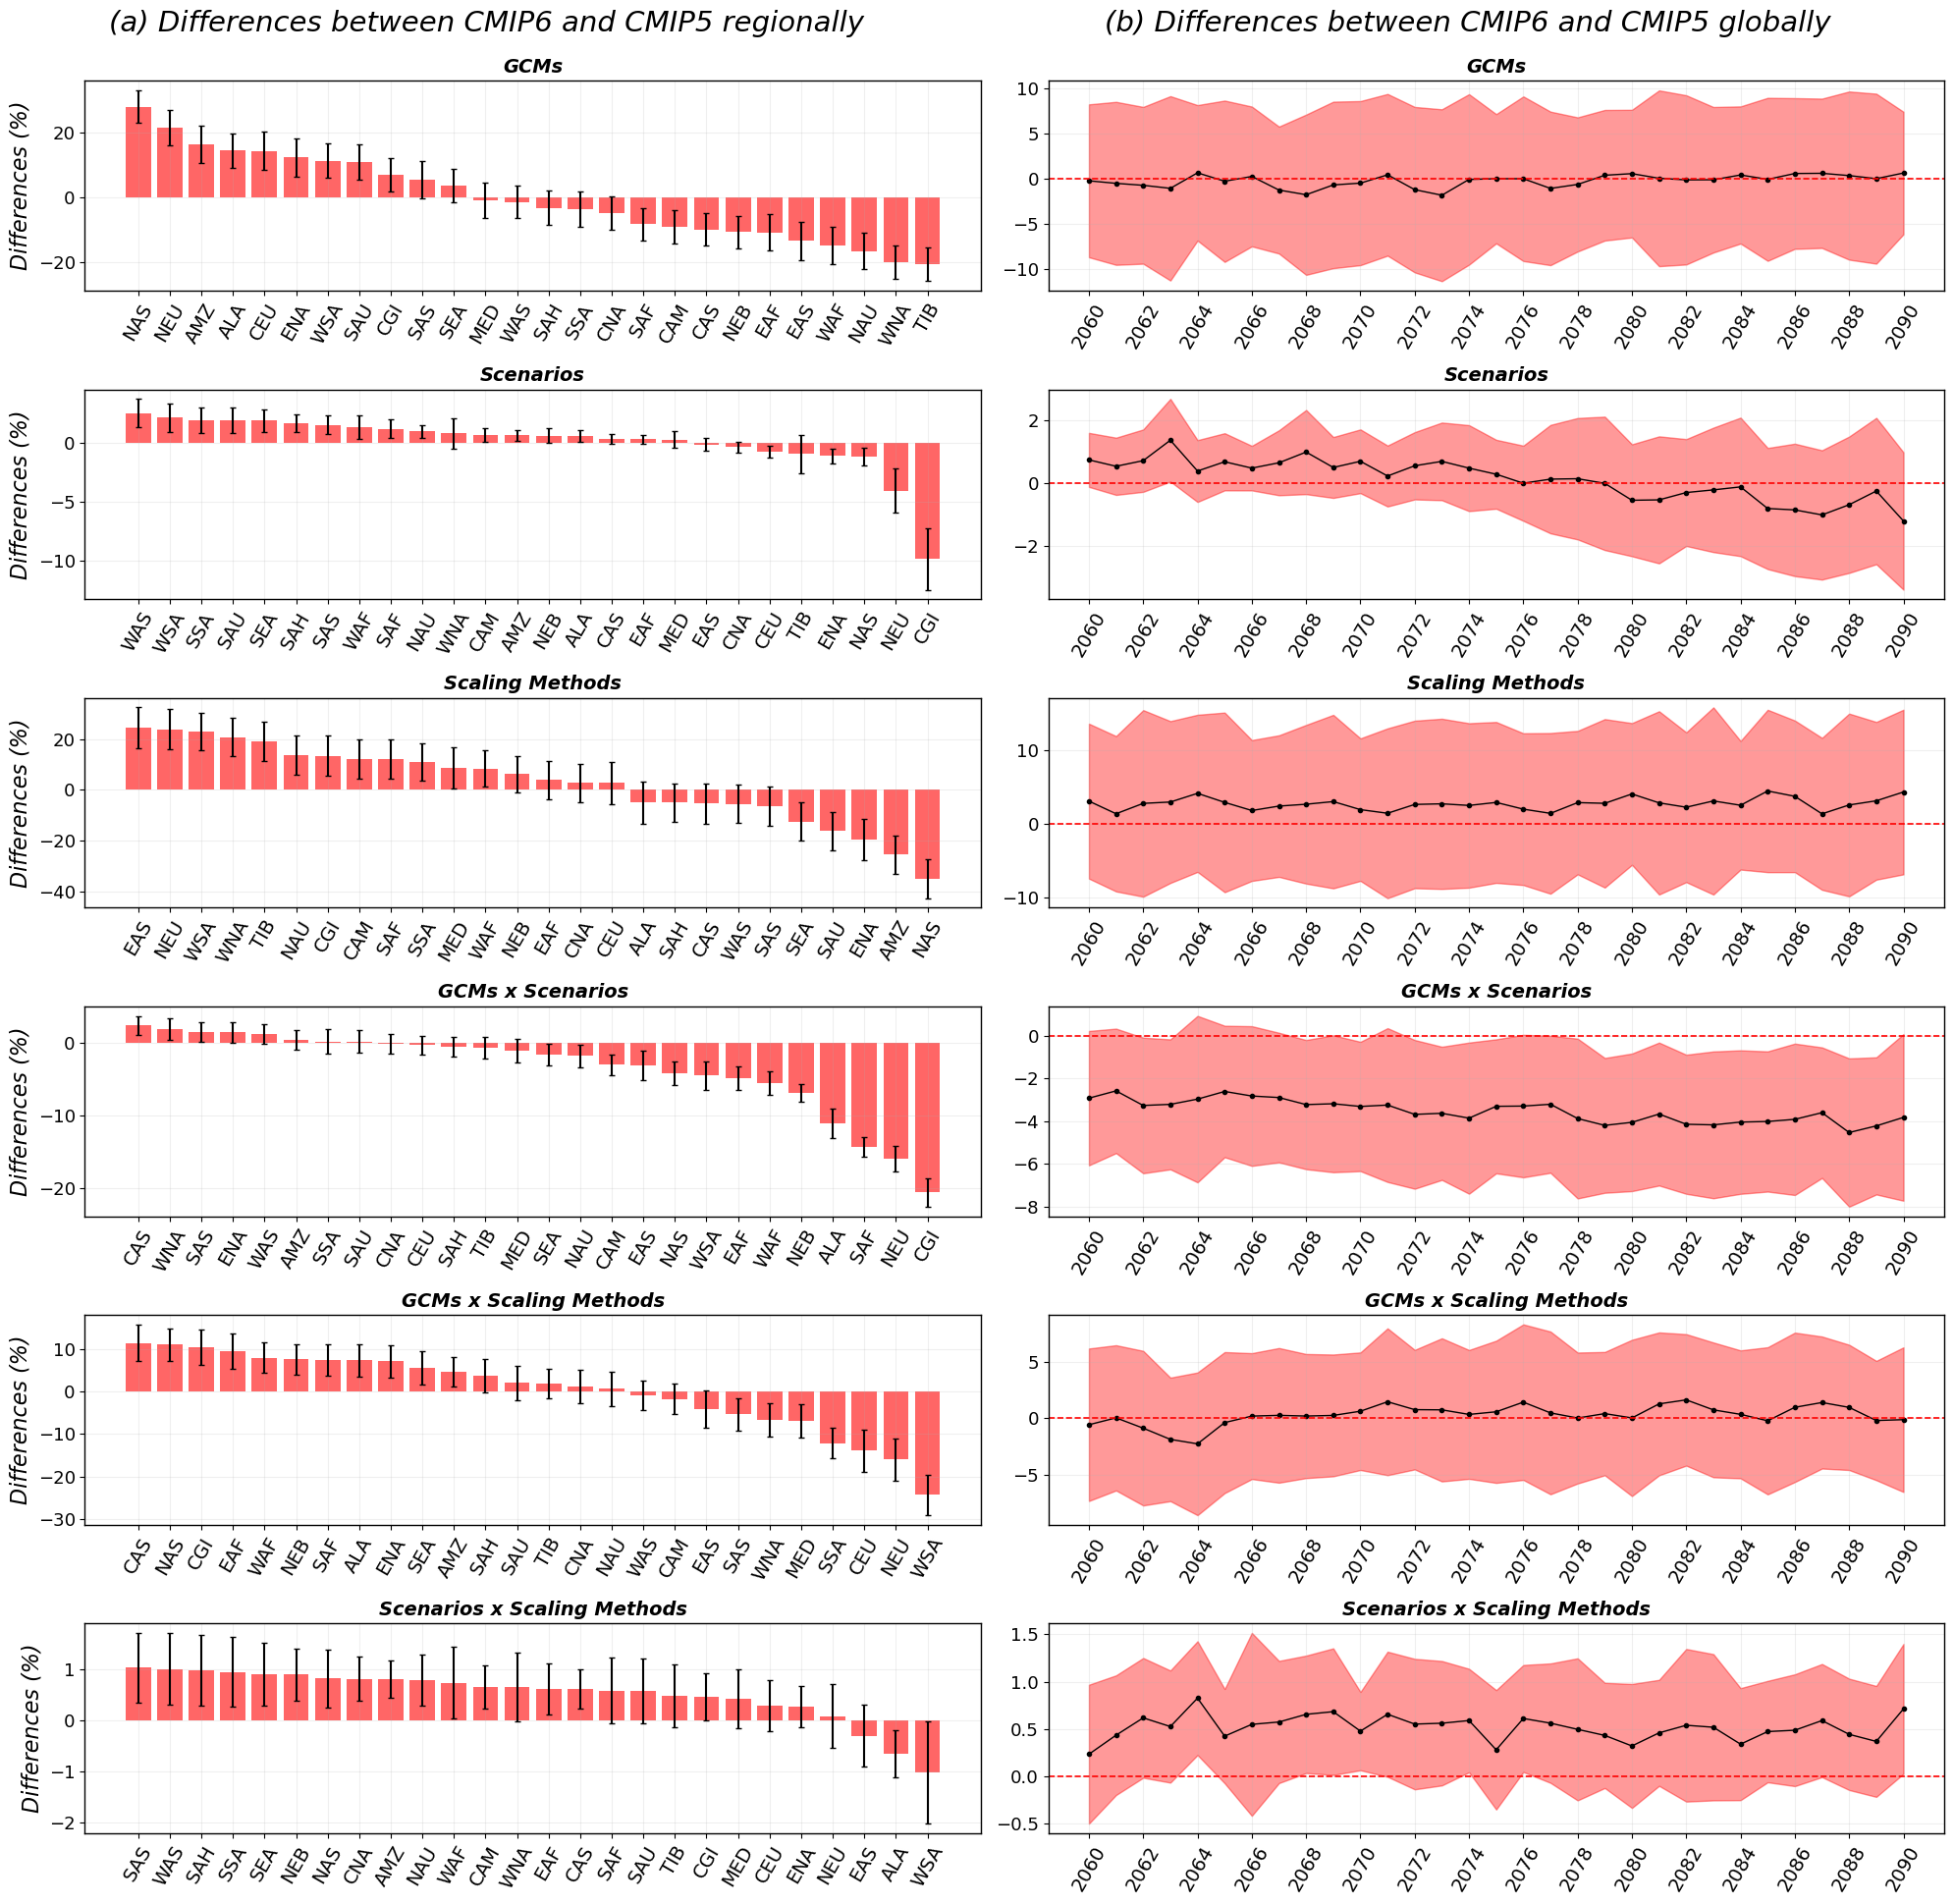

In [14]:
metrics = ['GCMs', 'Scenarios', 'Scaling Methods', 'GCMs x Scenarios', 'GCMs x Scaling Methods', 'Scenarios x Scaling Methods']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))

for i, metric in enumerate(metrics):
    ax = axes[i, 0]
    
    avg = diff.groupby('code')[metric].mean()
    std_dev = diff.groupby('code')[metric].std()
 
    plot_df = pd.DataFrame({
        'avg': avg,
        'std_dev': std_dev/2
    })

    plot_df = plot_df.sort_values(by='avg', ascending=False)

    ax.bar(plot_df.index, plot_df['avg'], yerr=plot_df['std_dev'], capsize=2, color='red', alpha=.6, label=f'Average {metric}')
    
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    
    ax.set_ylabel('Differences (%)', style="italic", fontsize=16)
    ax.set_title(f'{metric}', fontweight="bold", style="italic", fontsize=14)
    ax.grid(True, linestyle='-', alpha=0.2)
    ax.tick_params(axis='y', labelsize=13)

for i, metric in enumerate(metrics):
    ax = axes[i, 1]

    avg = diff.groupby('year')[metric].mean()
    std_dev = diff.groupby('year')[metric].std()

    ax.plot(avg.index, avg.values, label=f'Average {metric}', marker='o', linestyle='-', linewidth=1, color='black', markersize=3)
    ax.fill_between(avg.index, avg - std_dev/2, avg + std_dev/2, color='red', alpha=.4, label=f'± SD {metric}')
    ax.axhline(y=0, color='r', linewidth=1.2, linestyle='--')
    
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    
    ax.set_title(f'{metric}', fontweight="bold", style="italic", fontsize=14)
    ax.grid(True, linestyle='-', alpha=0.2)
    
    years = avg.index
    tick_positions = years[::2]  
    ax.set_xticks(tick_positions)
    ax.tick_params(axis='y', labelsize=13)

for ax in axes[:, 0]: 
    ax.tick_params(axis='x', labelrotation=60)
    for label in ax.get_xticklabels():
        label.set_fontsize(14)

for ax in axes[:, 1]: 
    ax.tick_params(axis='x', labelrotation=60)
    for label in ax.get_xticklabels():
        label.set_fontsize(14)


fig.text(0.25, 0.96, '(a) Differences between CMIP6 and CMIP5 regionally', ha='center', va='center', fontsize=21, style="italic")
fig.text(0.75, 0.96, '(b) Differences between CMIP6 and CMIP5 globally', ha='center', va='center', fontsize=21, style="italic")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
